# Data Exploration on MovieLens25M Data

## Initialize

### Download the dataset

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1995d1KMvceeYO7g9oFTA90VbfKO1mAGH' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1995d1KMvceeYO7g9oFTA90VbfKO1mAGH" -O ../data/MovieLens25M/genome-scores.csv && rm -rf /tmp/cookies.txt
# !wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1995d1KMvceeYO7g9oFTA90VbfKO1mAGH' -O ../data/MovieLens25M/genome-scores.csv
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1BXpm5PhinwhoD9x8wgiM-H7IjHD1NxDc' -O ../data/MovieLens25M/genome-tags.csv
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1sDu8Tk2Ut9ytMT2lgmokKw3Zx4T9BX5T' -O ../data/MovieLens25M/links.csv
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1j6gwSxbeOBULLdKbVVBw0QbRHAO_JXLv' -O ../data/MovieLens25M/movies.csv
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Ly6qnuHMBtYZFNYNBdUwreUha8djJvrZ' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1Ly6qnuHMBtYZFNYNBdUwreUha8djJvrZ" -O ../data/MovieLens25M/ratings.csv && rm -rf /tmp/cookies.txt
# !wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Ly6qnuHMBtYZFNYNBdUwreUha8djJvrZ' -O ../data/MovieLens25M/ratings.csv
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1LVAaiQv9XE8pV8k3wU9RAhbWH-xOCqU3' -O ../data/MovieLens25M/tags.csv

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# define the paths
data_path = '../data/MovieLens25M/'

In [4]:
df_rating = pd.read_csv(data_path+'ratings.csv')
df_rating.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


Check whether the rating file contains null data

In [5]:
df_rating.isnull().values.any()

False

## Exploration

In [6]:
data_path

'../data/MovieLens25M/'

In this section, we will find the number of users, ratings, unique dates and movies in the dataset

In [7]:
numOfMovies = df_rating['movieId'].nunique()
numOfUsers = df_rating['userId'].nunique()
numOfRatings = len(df_rating)

In [8]:
print(f"Number of movies been rated: {numOfMovies}")
print(f"Number of users have rated at least one movie: {numOfUsers}")
print(f"Number of ratings: {numOfRatings}")

Number of movies been rated: 59047
Number of users have rated at least one movie: 162541
Number of ratings: 25000095


In [9]:
group_by_rating = df_rating.groupby('rating')
rating_counts = group_by_rating.count()
# print(rating_counts)
ratings = rating_counts['movieId']
print(ratings)
# ratings.describe()

rating
0.5     393068
1.0     776815
1.5     399490
2.0    1640868
2.5    1262797
3.0    4896928
3.5    3177318
4.0    6639798
4.5    2200539
5.0    3612474
Name: movieId, dtype: int64


rating
0.5     1.572266
1.0     3.107248
1.5     1.597954
2.0     6.563447
2.5     5.051169
3.0    19.587638
3.5    12.709224
4.0    26.559091
4.5     8.802123
5.0    14.449841
Name: movieId, dtype: float64


<AxesSubplot:title={'center':'Percentage of each rating'}, xlabel='rating', ylabel='Percentage'>

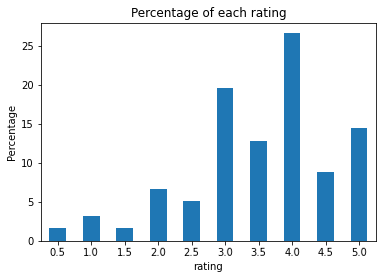

In [10]:
percentage = ratings/numOfRatings*100
print(percentage)
percentage.plot.bar(title='Percentage of each rating', ylabel='Percentage', rot=1)